**WINFRED NGURE KPSK-DEKUT-2-33**

**VALENTINE MWAI KPSK-DEKUT-2-8**

**ALVIN ONDIEKI KPSK-DEKUT-2-19**

**BRIAN MUTWIRI KPSK-DEKUT-2-27**

**ZIPPORAH MUTUA**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA

In [2]:
bt = pd.read_csv("bank_transactions_data_2.csv")

In [3]:
bt.head()


TransactionID AccountID  TransactionAmount   TransactionDate  \
0      TX000001   AC00128              14.09   11/4/2023 16:29   
1      TX000002   AC00455             376.24  27/06/2023 16:44   
2      TX000003   AC00019             126.29   10/7/2023 18:16   
3      TX000004   AC00070             184.50    5/5/2023 16:32   
4      TX000005   AC00411              13.45  16/10/2023 17:51   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   
1           68             Doctor                  141              1   
2           19            Student                   56              1   
3           26            Student                   25              1   
4           26            Student                  198              1   

   AccountBalance PreviousTransactionDate  
0         5112.21          4/11/2024 8:08  
1        13758.91          4/11/2024 8:09  
2         1122.35          4/11/2024 8:07  
3         8569.06          4/11/2024 8:09  
4         7429.40          4/11/2024 8:06

In [4]:
bt.columns



Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

In [5]:
bt.dtypes

TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object

In [6]:
bt.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [7]:
bt["TransactionType"].unique()

array(['Debit', 'Credit'], dtype=object)

In [8]:
bt["Location"].unique()

array(['San Diego', 'Houston', 'Mesa', 'Raleigh', 'Atlanta',
       'Oklahoma City', 'Seattle', 'Indianapolis', 'Detroit', 'Nashville',
       'Albuquerque', 'Memphis', 'Louisville', 'Denver', 'Austin',
       'Columbus', 'Los Angeles', 'Las Vegas', 'Fort Worth', 'Miami',
       'Milwaukee', 'Baltimore', 'New York', 'San Francisco', 'San Jose',
       'San Antonio', 'Philadelphia', 'Charlotte', 'Tucson', 'Chicago',
       'Sacramento', 'Kansas City', 'Omaha', 'Virginia Beach', 'Dallas',
       'Boston', 'Jacksonville', 'Phoenix', 'Washington', 'El Paso',
       'Colorado Springs', 'Fresno', 'Portland'], dtype=object)

In [9]:
bt["Channel"].unique()

array(['ATM', 'Online', 'Branch'], dtype=object)

In [10]:
bt["CustomerOccupation"].unique()

array(['Doctor', 'Student', 'Retired', 'Engineer'], dtype=object)

In [11]:
bt["MerchantID"].unique()

array(['M015', 'M052', 'M009', 'M002', 'M091', 'M054', 'M019', 'M020',
       'M035', 'M007', 'M073', 'M030', 'M057', 'M025', 'M017', 'M048',
       'M059', 'M039', 'M040', 'M065', 'M022', 'M083', 'M028', 'M043',
       'M029', 'M008', 'M092', 'M053', 'M094', 'M074', 'M014', 'M046',
       'M044', 'M005', 'M051', 'M070', 'M090', 'M023', 'M055', 'M078',
       'M036', 'M095', 'M075', 'M064', 'M087', 'M097', 'M001', 'M071',
       'M003', 'M063', 'M066', 'M060', 'M045', 'M032', 'M081', 'M004',
       'M012', 'M033', 'M049', 'M047', 'M093', 'M099', 'M077', 'M089',
       'M042', 'M086', 'M041', 'M076', 'M006', 'M026', 'M062', 'M098',
       'M034', 'M067', 'M085', 'M056', 'M058', 'M100', 'M010', 'M013',
       'M018', 'M088', 'M084', 'M072', 'M069', 'M038', 'M061', 'M037',
       'M082', 'M031', 'M080', 'M021', 'M024', 'M079', 'M096', 'M050',
       'M011', 'M068', 'M027', 'M016'], dtype=object)

In [12]:
bt["LoginAttempts"].unique()

array([1, 3, 5, 2, 4])

C:\Users\Alvin\AppData\Local\Temp\ipykernel_17688\855825017.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=bt["TransactionType"], palette='Set2')


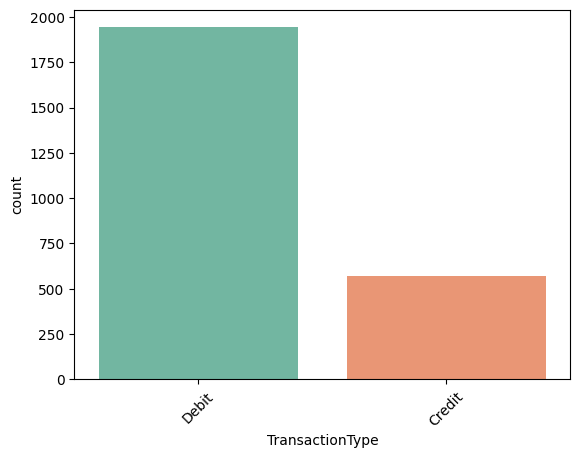

In [13]:
sns.countplot(x=bt["TransactionType"], palette='Set2')
plt.xticks(rotation=45)
plt.show()

In [14]:
bt["AccountID"].unique()

array(['AC00128', 'AC00455', 'AC00019', 'AC00070', 'AC00411', 'AC00393',
       'AC00199', 'AC00069', 'AC00135', 'AC00385', 'AC00150', 'AC00459',
       'AC00392', 'AC00264', 'AC00085', 'AC00270', 'AC00317', 'AC00359',
       'AC00242', 'AC00285', 'AC00002', 'AC00014', 'AC00095', 'AC00453',
       'AC00241', 'AC00041', 'AC00441', 'AC00057', 'AC00390', 'AC00313',
       'AC00367', 'AC00291', 'AC00060', 'AC00365', 'AC00267', 'AC00404',
       'AC00202', 'AC00478', 'AC00405', 'AC00421', 'AC00480', 'AC00120',
       'AC00117', 'AC00011', 'AC00401', 'AC00282', 'AC00439', 'AC00296',
       'AC00471', 'AC00159', 'AC00482', 'AC00115', 'AC00055', 'AC00419',
       'AC00374', 'AC00271', 'AC00456', 'AC00143', 'AC00427', 'AC00438',
       'AC00425', 'AC00325', 'AC00434', 'AC00319', 'AC00460', 'AC00461',
       'AC00395', 'AC00217', 'AC00053', 'AC00110', 'AC00265', 'AC00239',
       'AC00007', 'AC00022', 'AC00464', 'AC00406', 'AC00445', 'AC00236',
       'AC00220', 'AC00140', 'AC00098', 'AC00303', 

In [15]:
bt["AccountID"].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2507     True
2508     True
2509     True
2510     True
2511     True
Name: AccountID, Length: 2512, dtype: bool

In [16]:
bt['TransactionType'].value_counts()

TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64

In [17]:
location_counts = bt['Location'].value_counts()
location_counts

Location
Fort Worth          70
Los Angeles         69
Oklahoma City       68
Charlotte           68
Philadelphia        67
Tucson              67
Omaha               65
Miami               64
Memphis             63
Detroit             63
Houston             63
Denver              62
Kansas City         61
Boston              61
Seattle             61
Mesa                61
Atlanta             61
Fresno              60
Chicago             60
Colorado Springs    60
Jacksonville        60
San Jose            59
Raleigh             59
San Diego           59
San Antonio         59
Austin              59
Indianapolis        58
New York            58
San Francisco       57
Las Vegas           55
Nashville           55
Virginia Beach      55
Phoenix             55
Milwaukee           55
Columbus            54
Sacramento          53
Baltimore           51
Louisville          51
Dallas              49
Washington          48
El Paso             46
Portland            42
Albuquerque         41
Na

C:\Users\Alvin\AppData\Local\Temp\ipykernel_17688\728831409.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=bt["Channel"], palette='Set2')


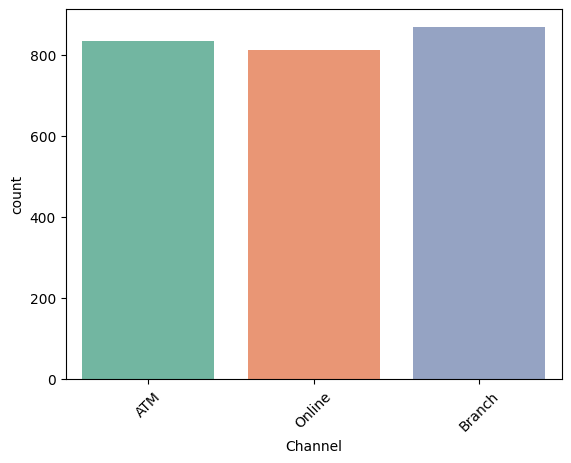

In [18]:
sns.countplot(x=bt["Channel"], palette='Set2')
plt.xticks(rotation=45)
plt.show()

C:\Users\Alvin\AppData\Local\Temp\ipykernel_17688\2619982820.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=bt["CustomerOccupation"], palette='Set2')


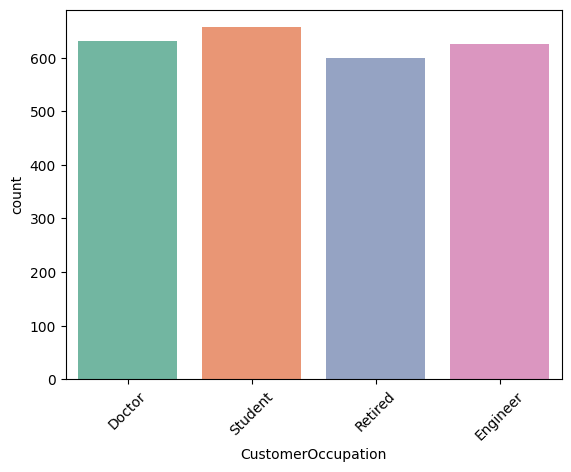

In [19]:
sns.countplot(x=bt["CustomerOccupation"], palette='Set2')
plt.xticks(rotation=45)
plt.show()

C:\Users\Alvin\AppData\Local\Temp\ipykernel_17688\3369363232.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=bt["LoginAttempts"], palette='Set2')


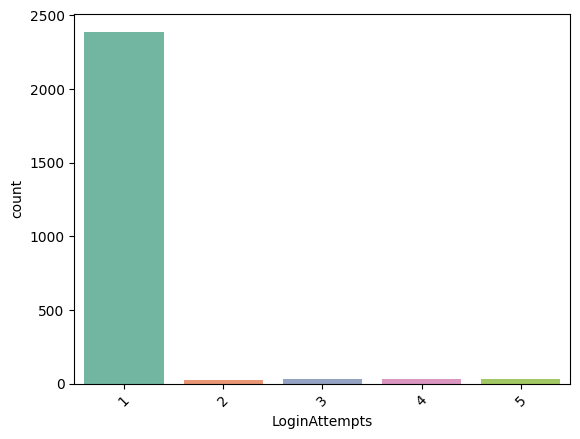

In [20]:
sns.countplot(x=bt["LoginAttempts"], palette='Set2')
plt.xticks(rotation=45)
plt.show()

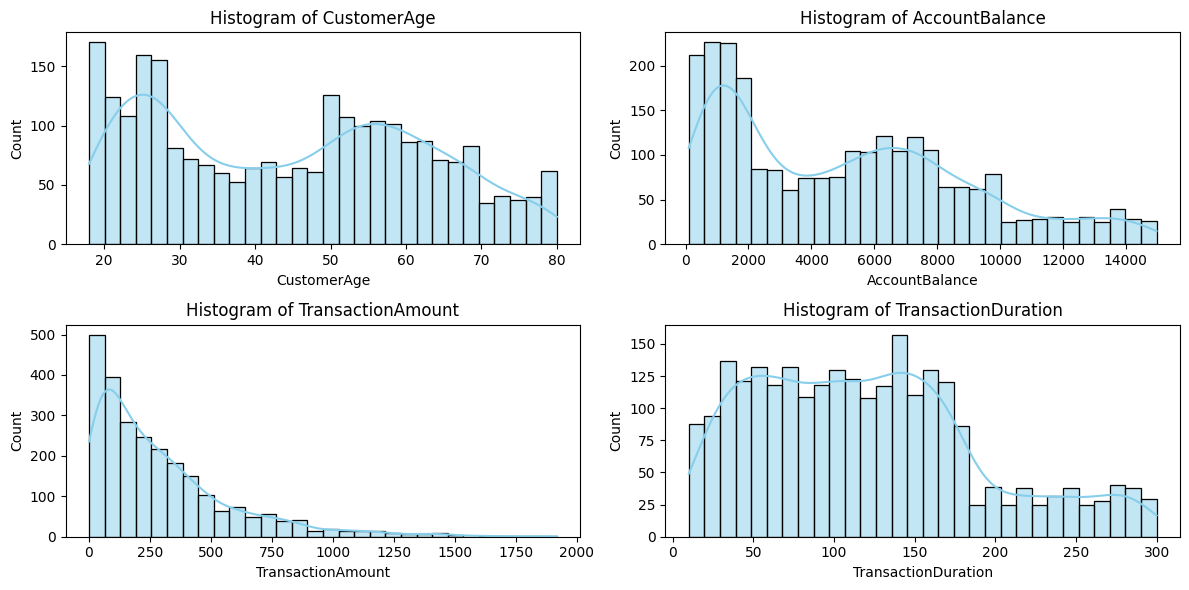

In [21]:
cols=["CustomerAge", "AccountBalance", "TransactionAmount", "TransactionDuration"]
plt.figure(figsize=(12,6))
for i, col in enumerate(cols,1):
    plt.subplot(2, 2, i)
    sns.histplot(bt[col], kde = True, bins=30, color='skyblue')
    plt.title(f"Histogram of {col}")

plt.tight_layout()
plt.show()




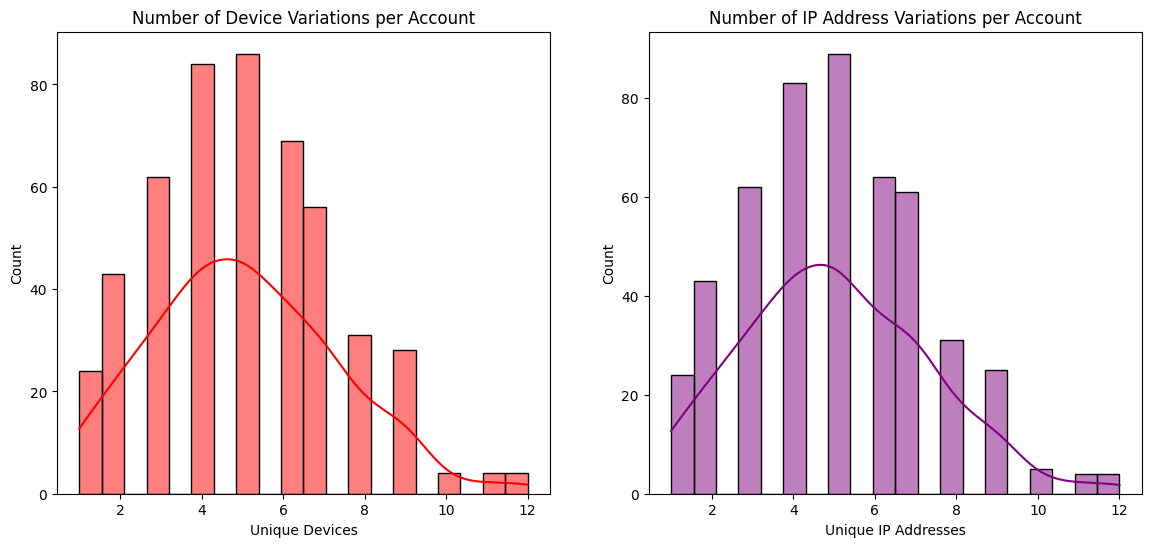

In [22]:
device_variations = bt.groupby('AccountID')['DeviceID'].nunique()
ip_variations = bt.groupby('AccountID')['IP Address'].nunique()
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(device_variations, bins=20, color='red', kde=True) #you can use shades of blue like slateblue
plt.title("Number of Device Variations per Account")
plt.xlabel("Unique Devices")
plt.subplot(1, 2, 2)
sns.histplot(ip_variations, bins=20, color='purple', kde=True)
plt.title("Number of IP Address Variations per Account")
plt.xlabel("Unique IP Addresses")
plt.show()

C:\Users\Alvin\AppData\Local\Temp\ipykernel_17688\1206520221.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=all_locations.index, x=all_locations.values, palette='viridis')


Text(0, 0.5, 'Location')

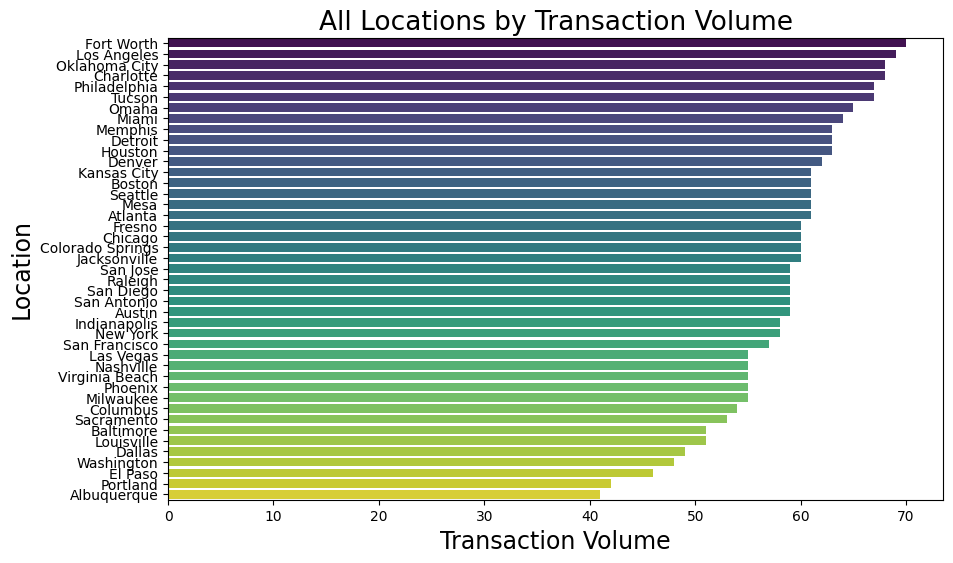

In [23]:
all_locations = bt['Location'].value_counts().head(43)

plt.figure(figsize=(10,6))
sns.barplot(y=all_locations.index, x=all_locations.values, palette='viridis')
plt.title('All Locations by Transaction Volume', fontsize=19)
plt.xlabel('Transaction Volume', fontsize=17)
plt.ylabel('Location', fontsize=17)

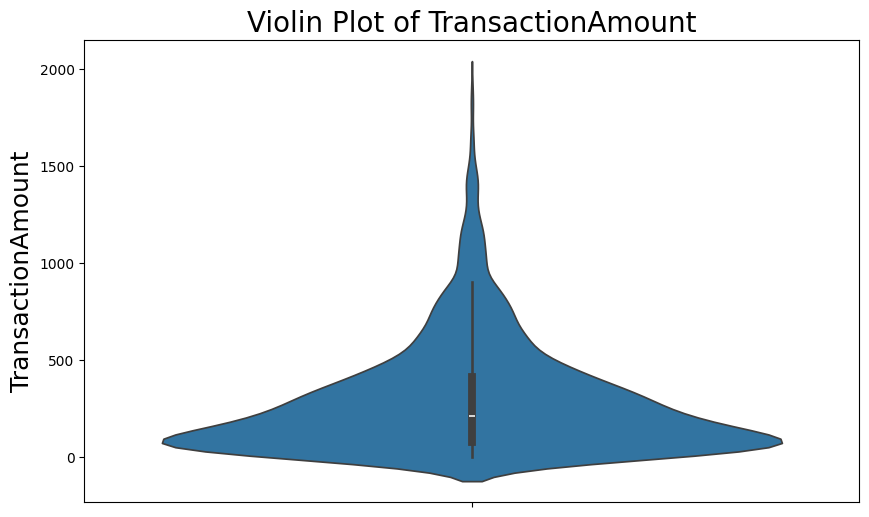

In [24]:
plt.figure(figsize=(10,6))
sns.violinplot(y='TransactionAmount', data=bt)

plt.title('Violin Plot of TransactionAmount', fontsize=20)

plt.ylabel('TransactionAmount', fontsize=18)

plt.show()

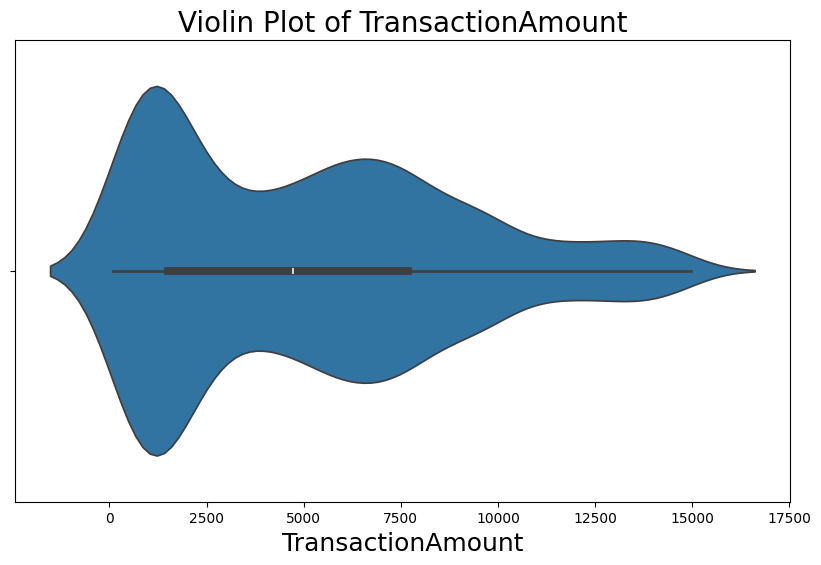

In [25]:
plt.figure(figsize=(10,6))
sns.violinplot(x='AccountBalance', data=bt)

plt.title('Violin Plot of TransactionAmount', fontsize=20)

plt.xlabel('TransactionAmount', fontsize=18)

plt.show()

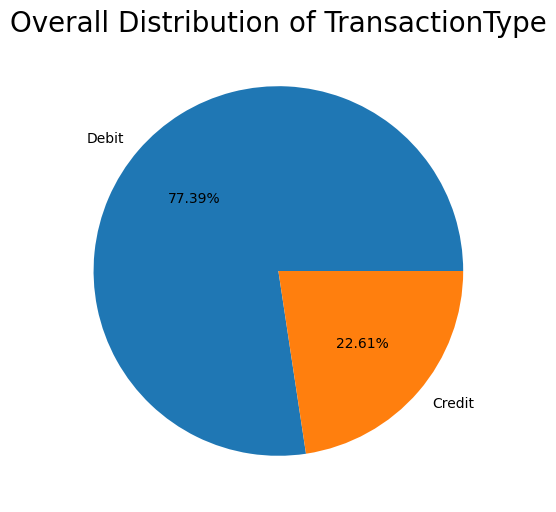

In [26]:
debitcard_counts = bt[bt['TransactionType']=='Debit']['TransactionType'].count()
creditcard_counts = bt[bt['TransactionType']=='Credit']['TransactionType'].count()
plt.figure(figsize=(10,6))

index_values = [debitcard_counts, creditcard_counts]
index_labels = ['Debit', 'Credit']

plt.pie(index_values, labels = index_labels, autopct='%2.2f%%')

plt.title('Overall Distribution of TransactionType', fontsize=20)

plt.show()

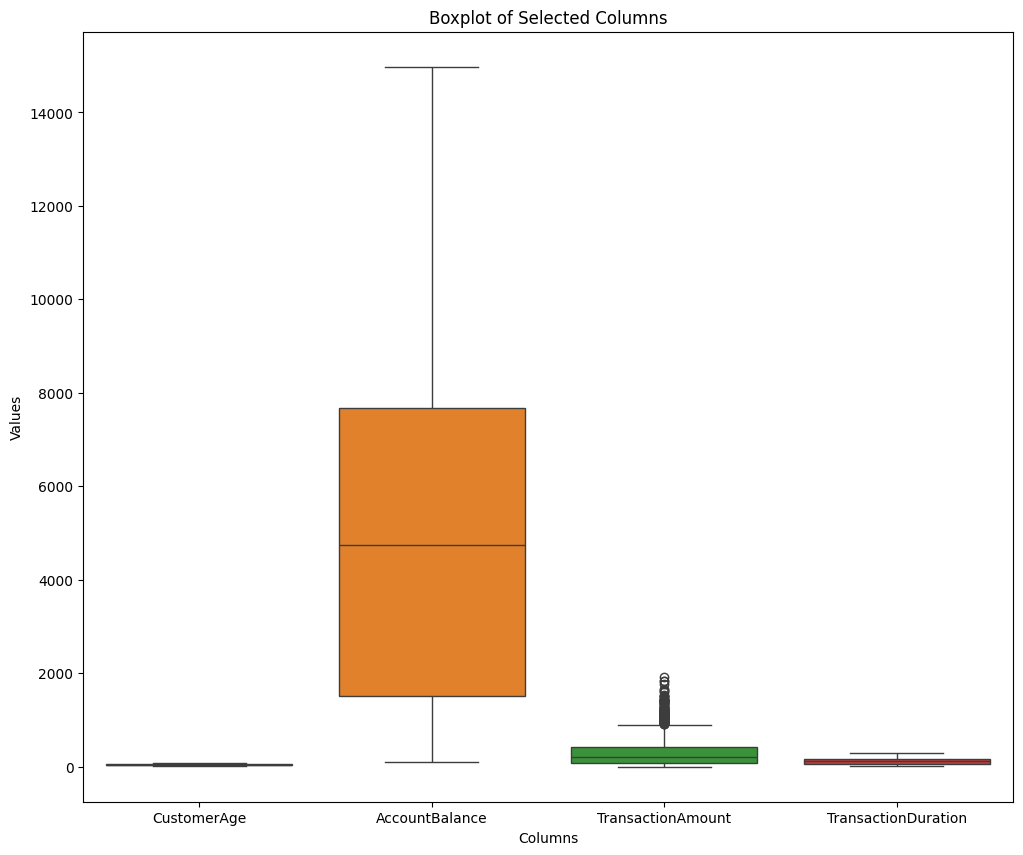

In [27]:
plt.figure(figsize=(12,10))
sns.boxplot(data=bt[cols])
plt.title("Boxplot of Selected Columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()


In [28]:
btd=bt.drop(columns=['TransactionID', 'AccountID', 'TransactionDate', 'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate'])

In [29]:
btd.columns

Index(['TransactionAmount', 'TransactionType', 'Location', 'Channel',
       'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance'],
      dtype='object')

In [30]:
btd.head()

TransactionAmount TransactionType   Location Channel  CustomerAge  \
0              14.09           Debit  San Diego     ATM           70   
1             376.24           Debit    Houston     ATM           68   
2             126.29           Debit       Mesa  Online           19   
3             184.50           Debit    Raleigh  Online           26   
4              13.45          Credit    Atlanta  Online           26   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
0             Doctor                   81              1         5112.21  
1             Doctor                  141              1        13758.91  
2            Student                   56              1         1122.35  
3            Student                   25              1         8569.06  
4            Student                  198              1         7429.40

In [31]:

categorical_cols=['Location', 'Channel', 'CustomerOccupation',  'TransactionType']
# Initialize LabelEncoder
label_encoders = {}
#Apply Label Encoding
for col in categorical_cols:
    le = LabelEncoder()
    btd[col] = le.fit_transform(btd[col])  # Transform categorical to numeric
    label_encoders[col] = le  # Store encoders for future inverse transformation

# Check the transformed data
btd.head()


TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0              14.09                1        36        0           70   
1             376.24                1        15        0           68   
2             126.29                1        23        2           19   
3             184.50                1        33        2           26   
4              13.45                0         1        2           26   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
0                   0                   81              1         5112.21  
1                   0                  141              1        13758.91  
2                   3                   56              1         1122.35  
3                   3                   25              1         8569.06  
4                   3                  198              1         7429.40

In [32]:
btd["Location"].unique()

array([36, 15, 23, 33,  1, 28, 39, 16, 11, 26,  0, 22, 21, 10,  2,  8, 20,
       19, 13, 24, 25,  3, 27, 37, 38, 35, 30,  5, 40,  6, 34, 18, 29, 41,
        9,  4, 17, 31, 42, 12,  7, 14, 32])

In [33]:
btd.shape

(2512, 9)

In [34]:
btd.nunique()

TransactionAmount      2455
TransactionType           2
Location                 43
Channel                   3
CustomerAge              63
CustomerOccupation        4
TransactionDuration     288
LoginAttempts             5
AccountBalance         2510
dtype: int64

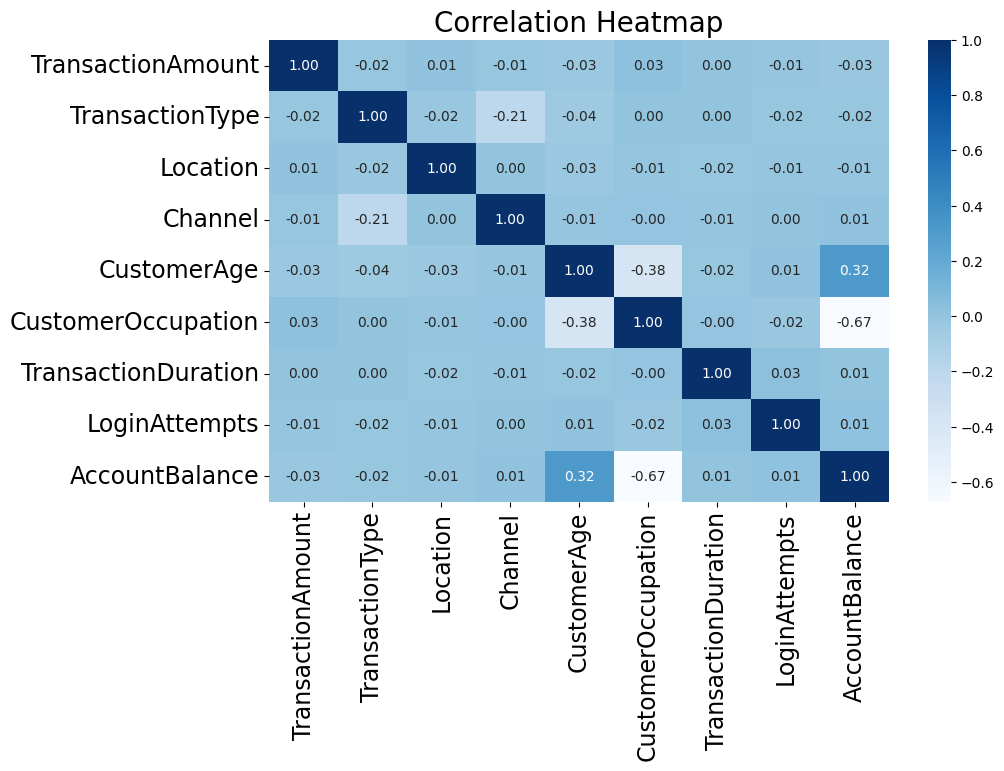

In [35]:
plt.figure(figsize=(10,6))
numeric_columns = btd.select_dtypes(include=np.number).columns

correlation_matrix = btd[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.xticks(rotation=90, fontsize=17)
plt.yticks(fontsize=17)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

**#scaling**

In [36]:

# Identify numerical columns
num_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Initialize StandardScaler
scaler = MinMaxScaler()

# Scale only numerical columns
btd_scaled = btd.copy()  # Create a copy to retain categorical columns
btd_scaled[num_cols] = scaler.fit_transform(btd[num_cols])

# Check the scaled data
print(btd_scaled.head())

   TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0           0.007207                1        36        0     0.838710   
1           0.195940                1        15        0     0.806452   
2           0.065680                1        23        2     0.016129   
3           0.096016                1        33        2     0.129032   
4           0.006874                0         1        2     0.129032   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
0                   0             0.244828            0.0        0.336832  
1                   0             0.451724            0.0        0.918055  
2                   3             0.158621            0.0        0.068637  
3                   3             0.051724            0.0        0.569198  
4                   3             0.648276            0.0        0.492591  


Feature Importance based on PCA:
CustomerAge            1.398052
LoginAttempts          1.331058
TransactionAmount      1.329152
AccountBalance         1.307893
CustomerOccupation     1.278199
TransactionType        1.223912
TransactionDuration    1.168923
Channel                1.158671
Location               1.003034
dtype: float64


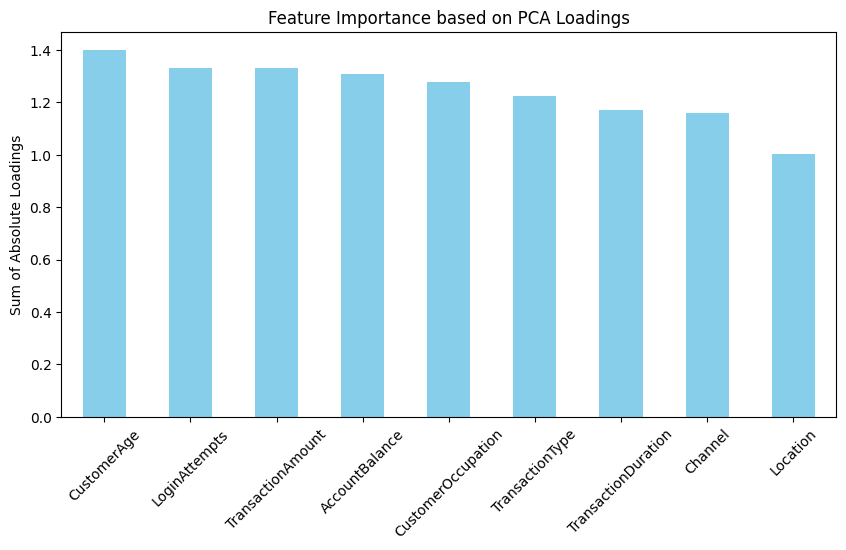

In [37]:
# Step 2: Apply PCA

import numpy as np
pca = PCA(n_components=len(btd_scaled.columns))  # Keep all components
pca.fit(btd_scaled)

# Step 3: Extract Feature Importance (Loadings)
loadings = pd.DataFrame(
    np.abs(pca.components_),  # Absolute values of PCA loadings
    columns=btd.columns,  # Feature names
    index=[f"PC{i+1}" for i in range(len(btd.columns))]  # Principal component names
)

# Step 4: Compute overall importance (sum of absolute loadings across PCs)
feature_importance = loadings.sum(axis=0).sort_values(ascending=False)

# Step 5: Display Most Important Features
print("Feature Importance based on PCA:")
print(feature_importance)

# Optional: Plot Feature Importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
feature_importance.plot(kind="bar", color="skyblue")
plt.title("Feature Importance based on PCA Loadings")
plt.ylabel("Sum of Absolute Loadings")
plt.xticks(rotation=45)
plt.show()

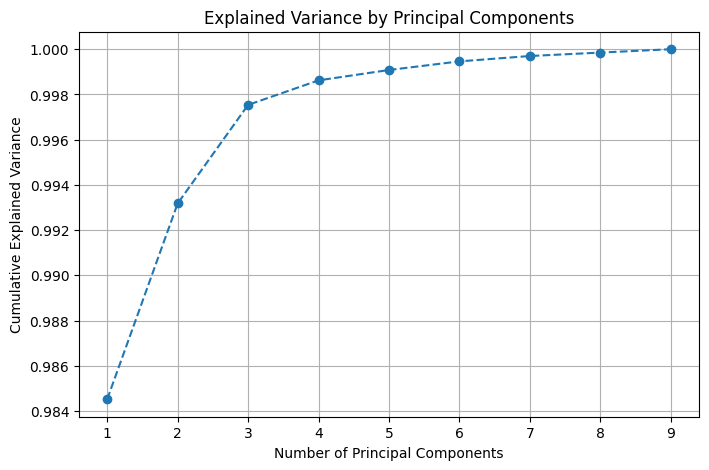

In [38]:
# Initialize PCA and fit
pca = PCA()
X_pca = pca.fit_transform(btd_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()


**K-Means Clustering with Login attempts and customer age features**

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X = bt[['LoginAttempts', 'CustomerAge']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


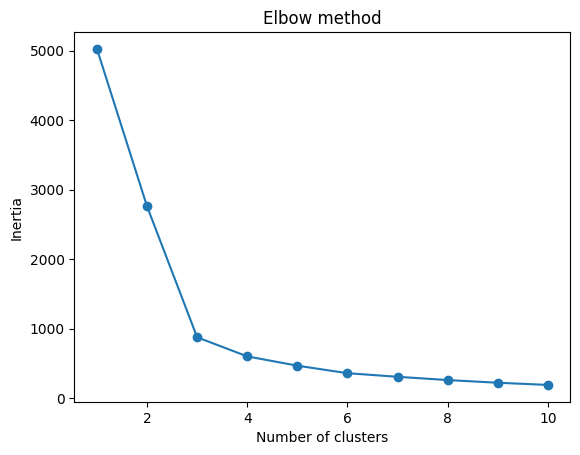

In [40]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [41]:
#Load the function silhouette_score
from sklearn.metrics import silhouette_score
S_score=[]
for K in range(2,11):
    X_kmeans_model=KMeans(n_clusters=K,init ='k-means++', random_state = 42)
    cluster_labels=X_kmeans_model.fit_predict(X_scaled)
    save=silhouette_score(X_scaled,cluster_labels)
    S_score.append(save)
    print(f"K:{K} - Silhouette score:{save:.3f}")

K:2 - Silhouette score:0.573
K:3 - Silhouette score:0.652
K:4 - Silhouette score:0.648
K:5 - Silhouette score:0.590
K:6 - Silhouette score:0.594
K:7 - Silhouette score:0.565
K:8 - Silhouette score:0.582
K:9 - Silhouette score:0.539
K:10 - Silhouette score:0.541


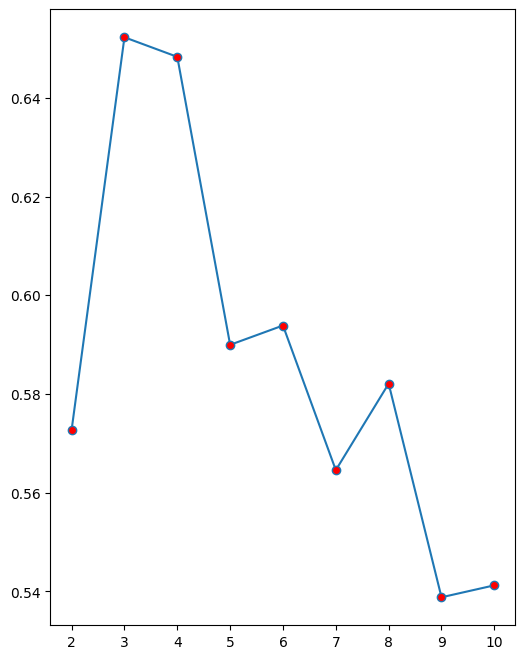

In [42]:
#Silhouette score plot
plt.figure(figsize=(6,8))
plt.plot(range(2,11),S_score,marker='o',linestyle='-',markerfacecolor="r")

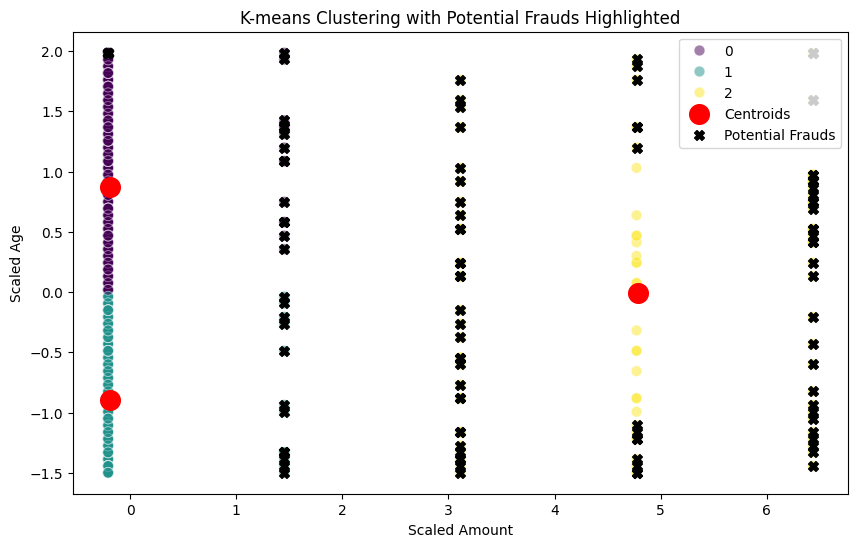

Number of potential frauds detected: 118


In [43]:

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add labels to the dataset
bt['KMeans_Cluster'] = kmeans_labels


# Calculate distance of each point to its assigned cluster centroid
distances = np.linalg.norm(X_scaled - kmeans.cluster_centers_[kmeans_labels], axis=1)

# Define a threshold (e.g., top 5% farthest from centroids)
threshold = np.percentile(distances, 95)  # Change this value as needed

# Flag points above the threshold as potential frauds
bt['Potential_Fraud'] = distances > threshold

# Separate fraudulent and non-fraudulent transactions
frauds = bt[bt['Potential_Fraud']]
non_frauds = bt[~bt['Potential_Fraud']]

# Plot with frauds highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis', s=60, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.scatter(X_scaled[distances > threshold, 0], X_scaled[distances > threshold, 1], 
            color='black', s=50, label='Potential Frauds', marker='X')
plt.title('K-means Clustering with Potential Frauds Highlighted')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend()
plt.show()

# Output the number of frauds detected
print(f"Number of potential frauds detected: {len(frauds)}")

**DB Scan Clustering method**

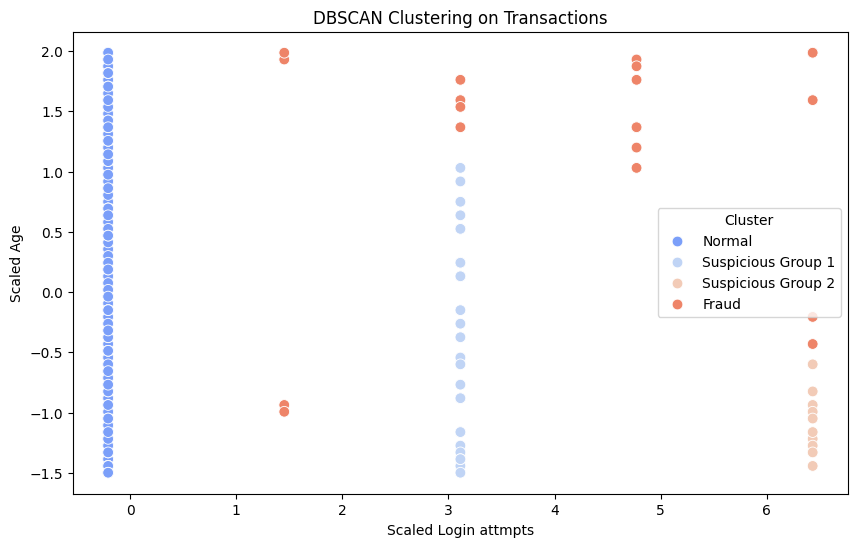

In [44]:
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

# Adjusted DBSCAN clustering with a refined eps value
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Adjust eps based on k-distance elbow
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add labels to the dataset
bt['DBSCAN_Cluster'] = dbscan_labels

# Map the cluster labels to descriptive names
label_mapping = {-1: 'Fraud', 0: 'Normal', 1: 'Suspicious Group 1', 2: 'Suspicious Group 2'}
bt['DBSCAN_Cluster'] = bt['DBSCAN_Cluster'].map(label_mapping)

# Plotting with updated labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=bt['DBSCAN_Cluster'], palette='coolwarm', s=60)
plt.title('DBSCAN Clustering on Transactions')
plt.xlabel('Scaled Login attmpts')
plt.ylabel('Scaled Age')
plt.legend(title='Cluster')
plt.show()

**Hierarchical Clustering on Login attempts**

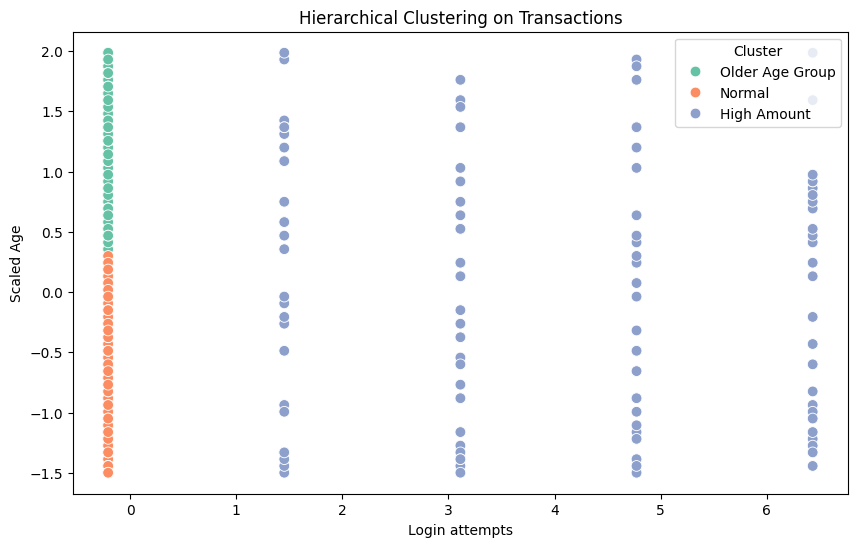

In [45]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Add labels to the dataset
bt['Hierarchical_Cluster'] = hierarchical_labels

# Mapping the cluster labels to descriptive names
cluster_mapping = {0: 'Normal', 1: 'High Amount', 2: 'Older Age Group'}
bt['Hierarchical_Cluster'] = bt['Hierarchical_Cluster'].map(cluster_mapping)

# Plot with updated labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=bt['Hierarchical_Cluster'], palette='Set2', s=60)
plt.title('Hierarchical Clustering on Transactions')
plt.xlabel('Login attempts')
plt.ylabel('Scaled Age')
plt.legend(title='Cluster')
plt.show()

**K-Means Clustering with Transaction amount and customer age features**

In [46]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X = bt[['TransactionAmount', 'CustomerAge']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


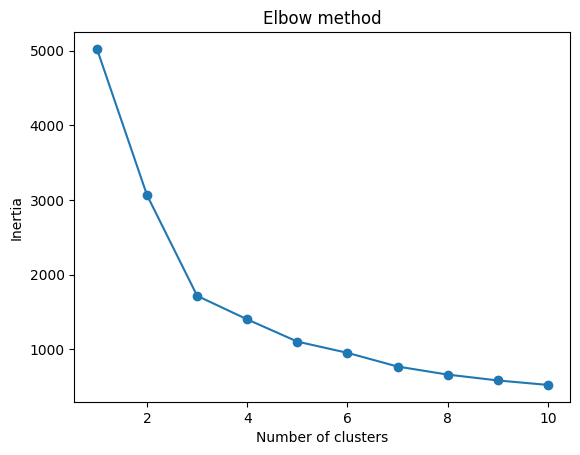

In [47]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [48]:
#Load the function silhouette_score
from sklearn.metrics import silhouette_score
S_score=[]
for K in range(2,11):
    X_kmeans_model=KMeans(n_clusters=K,init ='k-means++', random_state = 42)
    cluster_labels=X_kmeans_model.fit_predict(X_scaled)
    save=silhouette_score(X_scaled,cluster_labels)
    S_score.append(save)
    print(f"K:{K} - Silhouette score:{save:.2f}")

K:2 - Silhouette score:0.41
K:3 - Silhouette score:0.47
K:4 - Silhouette score:0.45
K:5 - Silhouette score:0.39
K:6 - Silhouette score:0.40
K:7 - Silhouette score:0.37
K:8 - Silhouette score:0.38
K:9 - Silhouette score:0.37
K:10 - Silhouette score:0.39


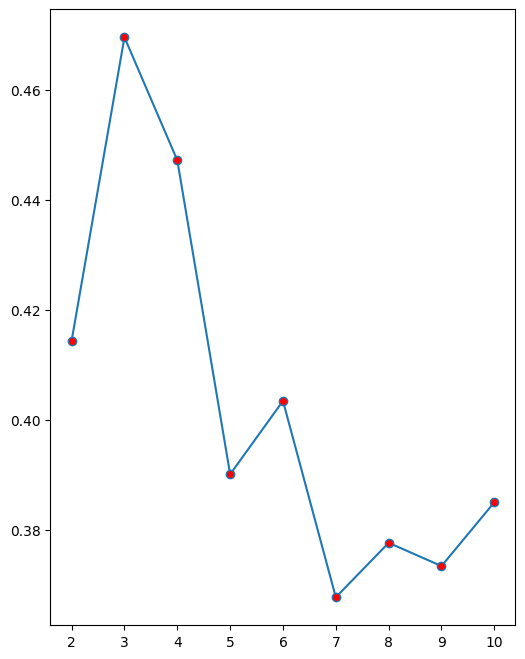

In [49]:
#Silhouette score plot
plt.figure(figsize=(6,8))
plt.plot(range(2,11),S_score,marker='o',linestyle='-',markerfacecolor="r")

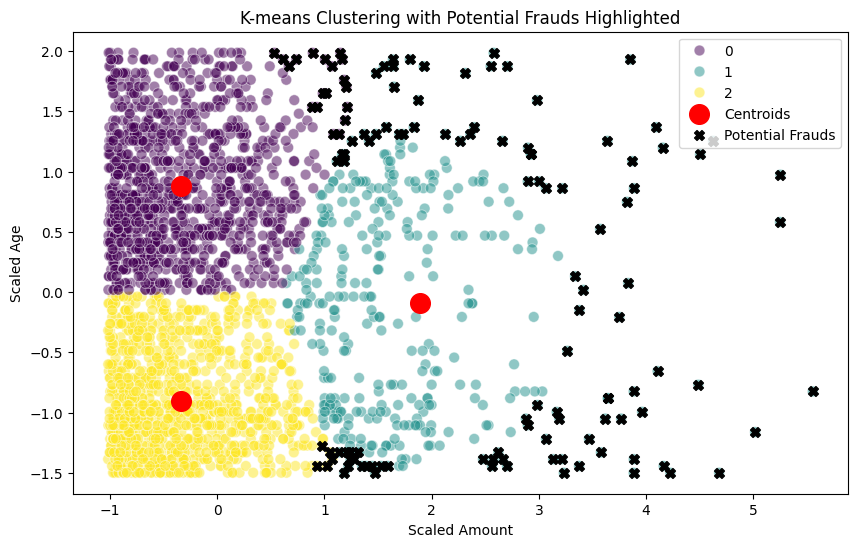

Number of potential frauds detected: 126


In [50]:

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add labels to the dataset
bt['KMeans_Cluster'] = kmeans_labels


# Calculate distance of each point to its assigned cluster centroid
distances = np.linalg.norm(X_scaled - kmeans.cluster_centers_[kmeans_labels], axis=1)

# Define a threshold (e.g., top 5% farthest from centroids)
threshold = np.percentile(distances, 95)  # Change this value as needed

# Flag points above the threshold as potential frauds
bt['Potential_Fraud'] = distances > threshold

# Separate fraudulent and non-fraudulent transactions
frauds = bt[bt['Potential_Fraud']]
non_frauds = bt[~bt['Potential_Fraud']]

# Plot with frauds highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis', s=60, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.scatter(X_scaled[distances > threshold, 0], X_scaled[distances > threshold, 1], 
            color='black', s=50, label='Potential Frauds', marker='X')
plt.title('K-means Clustering with Potential Frauds Highlighted')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend()
plt.show()

# Output the number of frauds detected
print(f"Number of potential frauds detected: {len(frauds)}")

**DB Scan Clustering on Transaction amount**

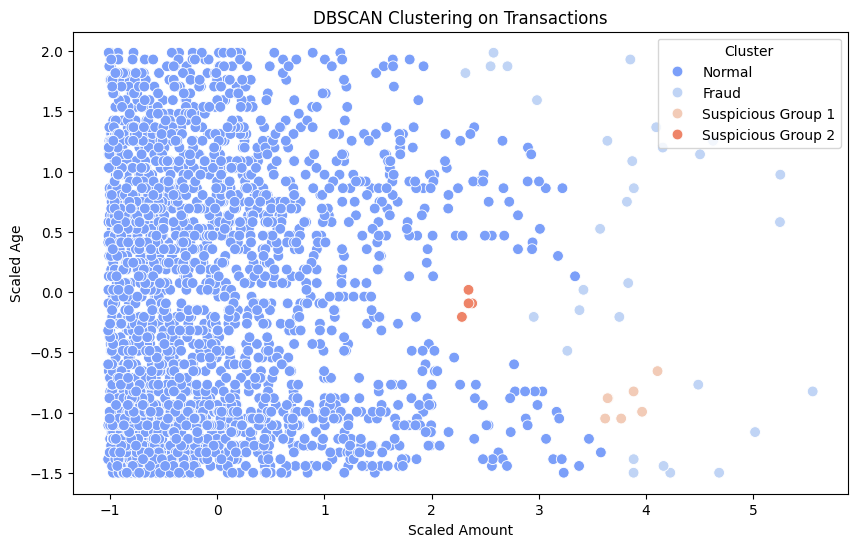

In [51]:
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

# Adjusted DBSCAN clustering with a refined eps value
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Adjust eps based on k-distance elbow
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add labels to the dataset
bt['DBSCAN_Cluster'] = dbscan_labels

# Map the cluster labels to descriptive names
label_mapping = {-1: 'Fraud', 0: 'Normal', 1: 'Suspicious Group 1', 2: 'Suspicious Group 2'}
bt['DBSCAN_Cluster'] = bt['DBSCAN_Cluster'].map(label_mapping)

# Plotting with updated labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=bt['DBSCAN_Cluster'], palette='coolwarm', s=60)
plt.title('DBSCAN Clustering on Transactions')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend(title='Cluster')
plt.show()

**Hierarchical Clustering on Transactions**

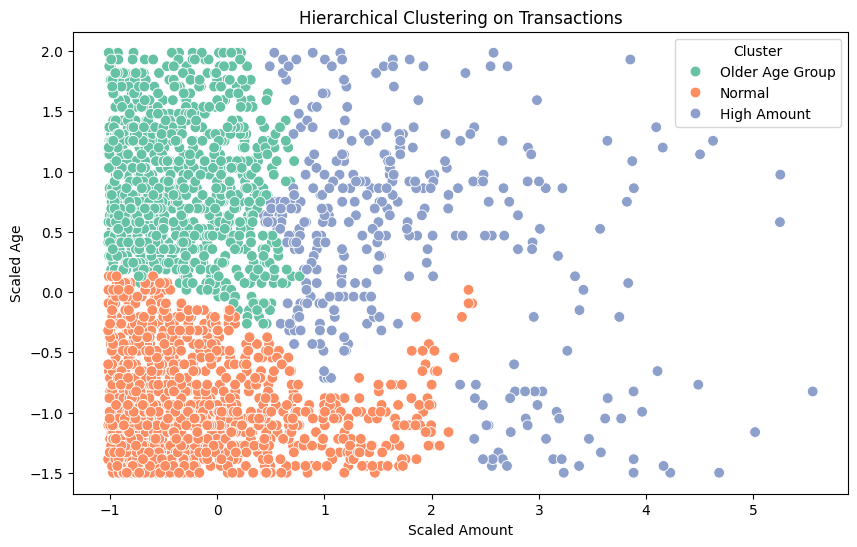

In [52]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Add labels to the dataset
bt['Hierarchical_Cluster'] = hierarchical_labels

# Mapping the cluster labels to descriptive names
cluster_mapping = {0: 'Normal', 1: 'High Amount', 2: 'Older Age Group'}
bt['Hierarchical_Cluster'] = bt['Hierarchical_Cluster'].map(cluster_mapping)

# Plot with updated labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=bt['Hierarchical_Cluster'], palette='Set2', s=60)
plt.title('Hierarchical Clustering on Transactions')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend(title='Cluster')
plt.show()

**Isolation Forest for Anomaly Detection**

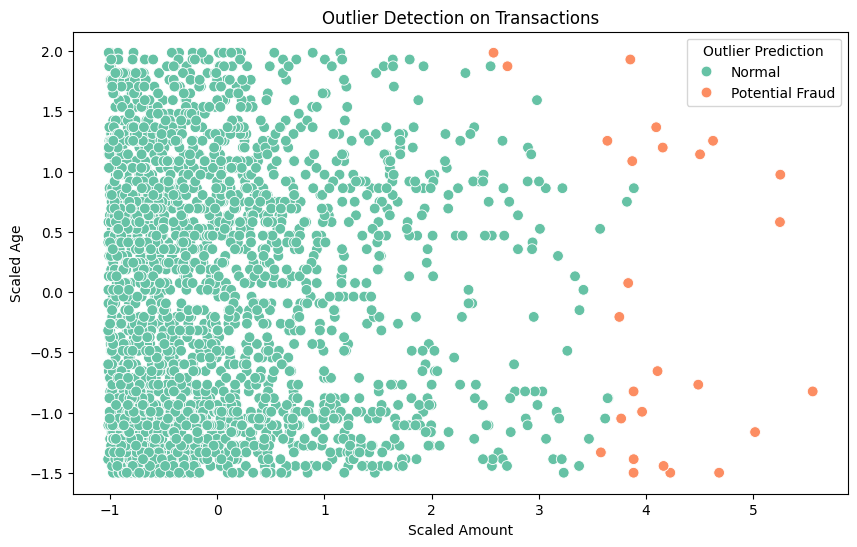

In [53]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest to identify anomalies
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # Set contamination rate to expected fraud rate
outlier_pred = iso_forest.fit_predict(X_scaled)

# Map the results (-1 for outliers, 1 for normal) to descriptive labels
outlier_mapping = {1: 'Normal', -1: 'Potential Fraud'}
bt['Outlier_Prediction'] = pd.Series(outlier_pred).map(outlier_mapping)

# Plotting with isolation forest outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=bt['Outlier_Prediction'], palette='Set2', s=60)
plt.title('Outlier Detection on Transactions')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend(title='Outlier Prediction')
plt.show()

**K-Means Clustering with Account balance and customer age features**

In [54]:
X = bt[['AccountBalance', 'CustomerAge']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


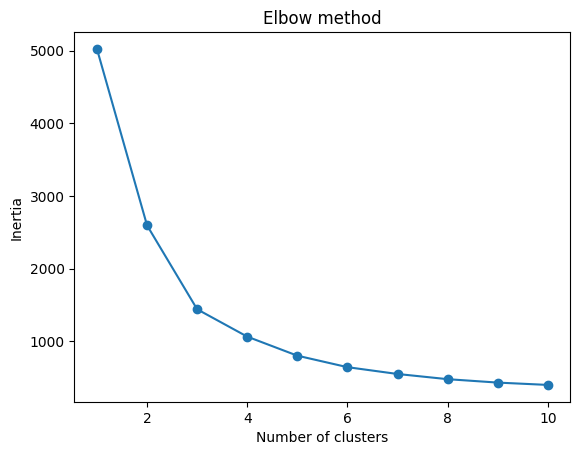

In [55]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [56]:
#Load the function silhouette_score
from sklearn.metrics import silhouette_score
S_score=[]
for K in range(2,11):
    X_kmeans_model=KMeans(n_clusters=K,init ='k-means++', random_state = 42)
    cluster_labels=X_kmeans_model.fit_predict(X_scaled)
    save=silhouette_score(X_scaled,cluster_labels)
    S_score.append(save)
    print(f"K:{K} - Silhouette score:{save:.4f}")

K:2 - Silhouette score:0.4432
K:3 - Silhouette score:0.4856
K:4 - Silhouette score:0.4861
K:5 - Silhouette score:0.4790
K:6 - Silhouette score:0.4817
K:7 - Silhouette score:0.4771
K:8 - Silhouette score:0.4653
K:9 - Silhouette score:0.4442
K:10 - Silhouette score:0.4486


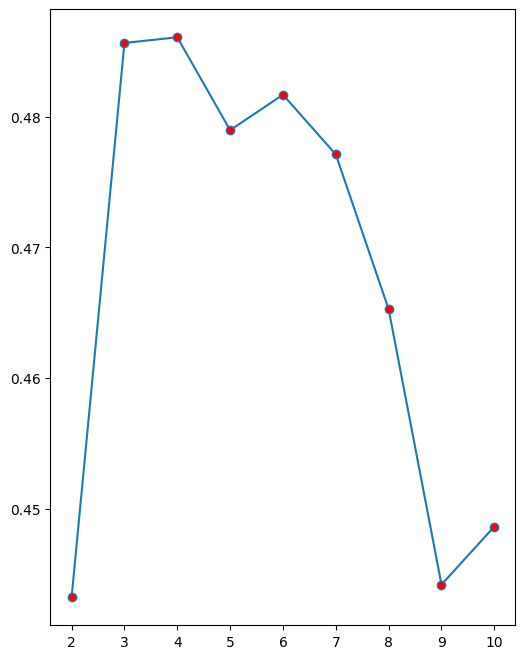

In [57]:
#Silhouette score plot
plt.figure(figsize=(6,8))
plt.plot(range(2,11),S_score,marker='o',linestyle='-',markerfacecolor="r")

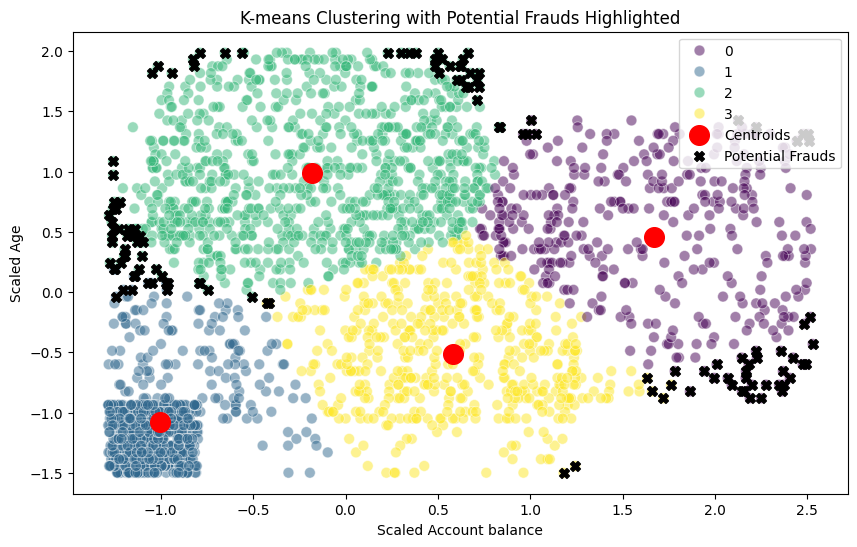

Number of potential frauds detected: 126


In [58]:
# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add labels to the dataset
bt['KMeans_Cluster'] = kmeans_labels


# Calculate distance of each point to its assigned cluster centroid
distances = np.linalg.norm(X_scaled - kmeans.cluster_centers_[kmeans_labels], axis=1)

# Define a threshold (e.g., top 5% farthest from centroids)
threshold = np.percentile(distances, 95)  # Change this value as needed

# Flag points above the threshold as potential frauds
bt['Potential_Fraud'] = distances > threshold

# Separate fraudulent and non-fraudulent transactions
frauds = bt[bt['Potential_Fraud']]
non_frauds = bt[~bt['Potential_Fraud']]

# Plot with frauds highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis', s=60, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.scatter(X_scaled[distances > threshold, 0], X_scaled[distances > threshold, 1], 
            color='black', s=50, label='Potential Frauds', marker='X')
plt.title('K-means Clustering with Potential Frauds Highlighted')
plt.xlabel('Scaled Account balance')
plt.ylabel('Scaled Age')
plt.legend()
plt.show()

# Output the number of frauds detected
print(f"Number of potential frauds detected: {len(frauds)}")

**DB Scan Clustering on Account balance**

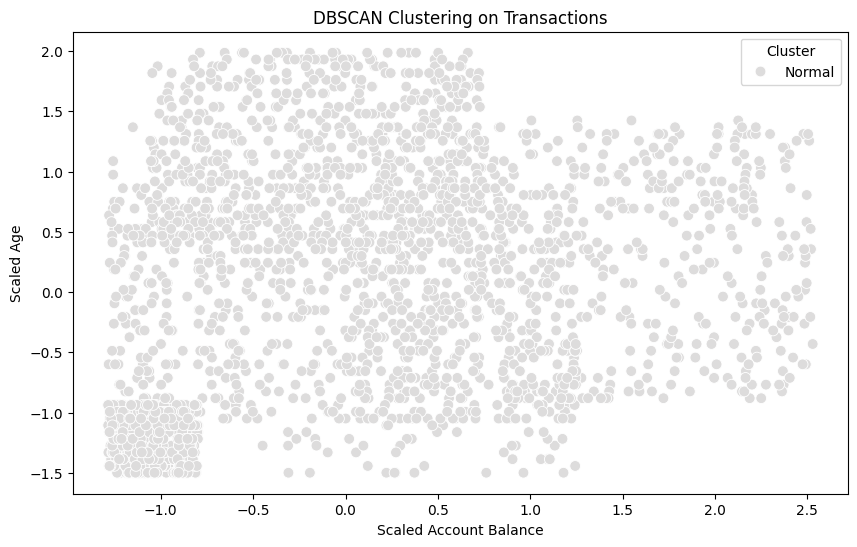

In [59]:
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

# Adjusted DBSCAN clustering with a refined eps value
dbscan = DBSCAN(eps=0.7, min_samples=9)  # Adjust eps based on k-distance elbow
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add labels to the dataset
bt['DBSCAN_Cluster'] = dbscan_labels

# Map the cluster labels to descriptive names
label_mapping = {-1: 'Fraud', 0: 'Normal', 1: 'Suspicious Group 1', 2: 'Suspicious Group 2'}
bt['DBSCAN_Cluster'] = bt['DBSCAN_Cluster'].map(label_mapping)

# Plotting with updated labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=bt['DBSCAN_Cluster'], palette='coolwarm', s=60)
plt.title('DBSCAN Clustering on Transactions')
plt.xlabel('Scaled Account Balance')
plt.ylabel('Scaled Age')
plt.legend(title='Cluster')
plt.show()

**Hierarchical Clustering on Transaction**

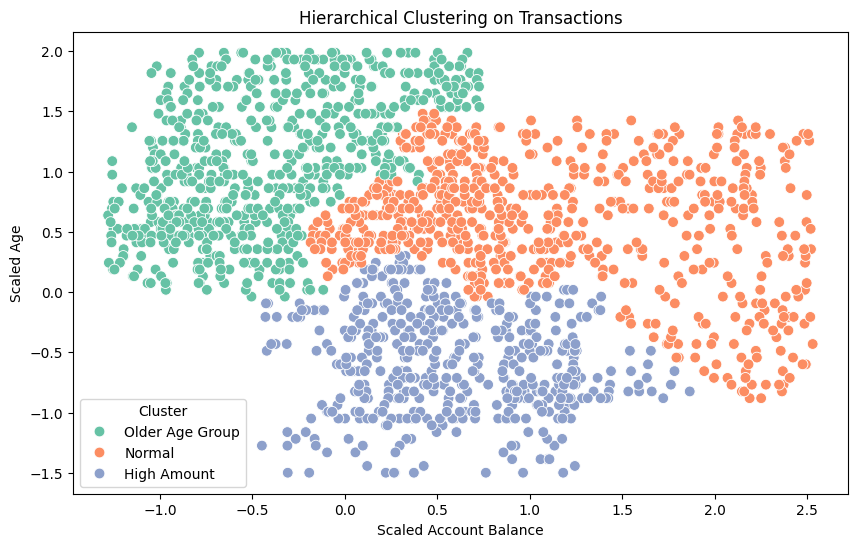

In [60]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Add labels to the dataset
bt['Hierarchical_Cluster'] = hierarchical_labels

# Mapping the cluster labels to descriptive names
cluster_mapping = {0: 'Normal', 1: 'High Amount', 2: 'Older Age Group'}
bt['Hierarchical_Cluster'] = bt['Hierarchical_Cluster'].map(cluster_mapping)

# Plot with updated labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=bt['Hierarchical_Cluster'], palette='Set2', s=60)
plt.title('Hierarchical Clustering on Transactions')
plt.xlabel('Scaled Account Balance')
plt.ylabel('Scaled Age')
plt.legend(title='Cluster')
plt.show()

**Isolation Forest for Anomaly Detection**

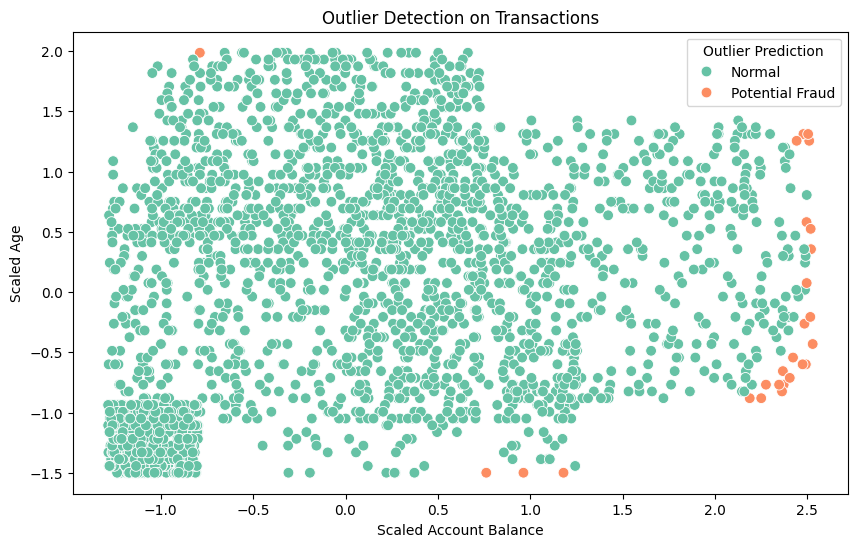

In [62]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest to identify anomalies
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # Set contamination rate to expected fraud rate
outlier_pred = iso_forest.fit_predict(X_scaled)

# Map the results (-1 for outliers, 1 for normal) to descriptive labels
outlier_mapping = {1: 'Normal', -1: 'Potential Fraud'}
bt['Outlier_Prediction'] = pd.Series(outlier_pred).map(outlier_mapping)

# Plotting with isolation forest outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=bt['Outlier_Prediction'], palette='Set2', s=60)
plt.title('Outlier Detection on Transactions')
plt.xlabel('Scaled Account Balance')
plt.ylabel('Scaled Age')
plt.legend(title='Outlier Prediction')
plt.show()

**K-Means Clustering with Account balance, customer age, transaction duration and customer age features**

In [63]:
X = bt[['AccountBalance', 'CustomerAge', 'TransactionDuration', 'TransactionAmount' ]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

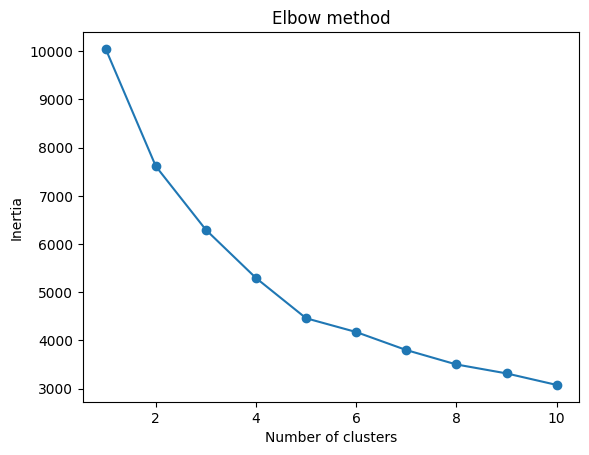

In [64]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [65]:
#Load the function silhouette_score
from sklearn.metrics import silhouette_score
S_score=[]
for K in range(2,11):
    X_kmeans_model=KMeans(n_clusters=K,init ='k-means++', random_state = 42)
    cluster_labels=X_kmeans_model.fit_predict(X_scaled)
    save=silhouette_score(X_scaled,cluster_labels)
    S_score.append(save)
    print(f"K:{K} - Silhouette score:{save:.4f}")

K:2 - Silhouette score:0.2488
K:3 - Silhouette score:0.2325
K:4 - Silhouette score:0.2518
K:5 - Silhouette score:0.2635
K:6 - Silhouette score:0.2381
K:7 - Silhouette score:0.2381
K:8 - Silhouette score:0.2263
K:9 - Silhouette score:0.2391
K:10 - Silhouette score:0.2423


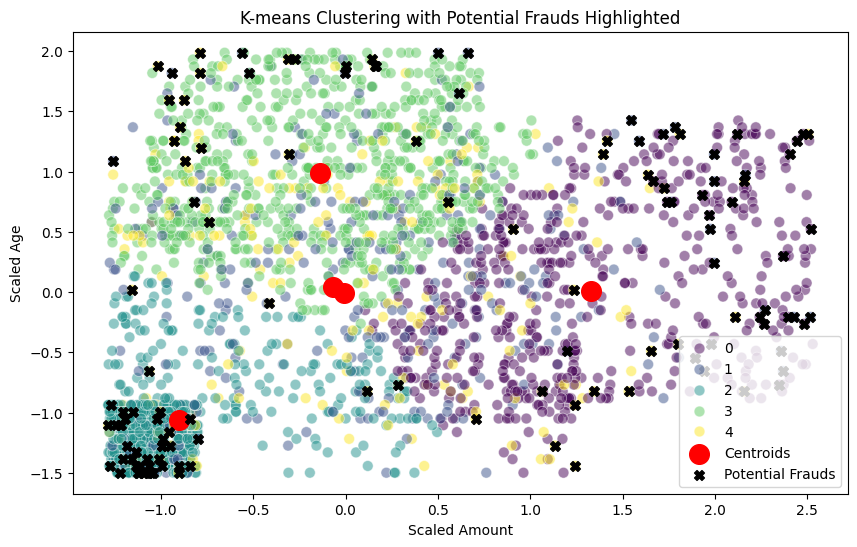

Number of potential frauds detected: 126


In [66]:
# K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add labels to the dataset
bt['KMeans_Cluster'] = kmeans_labels


# Calculate distance of each point to its assigned cluster centroid
distances = np.linalg.norm(X_scaled - kmeans.cluster_centers_[kmeans_labels], axis=1)

# Define a threshold (e.g., top 5% farthest from centroids)
threshold = np.percentile(distances, 95)  # Change this value as needed

# Flag points above the threshold as potential frauds
bt['Potential_Fraud'] = distances > threshold

# Separate fraudulent and non-fraudulent transactions
frauds = bt[bt['Potential_Fraud']]
non_frauds = bt[~bt['Potential_Fraud']]

# Plot with frauds highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis', s=60, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.scatter(X_scaled[distances > threshold, 0], X_scaled[distances > threshold, 1], 
            color='black', s=50, label='Potential Frauds', marker='X')
plt.title('K-means Clustering with Potential Frauds Highlighted')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend()
plt.show()

# Output the number of frauds detected
print(f"Number of potential frauds detected: {len(frauds)}")

**DB Scan Clustering**

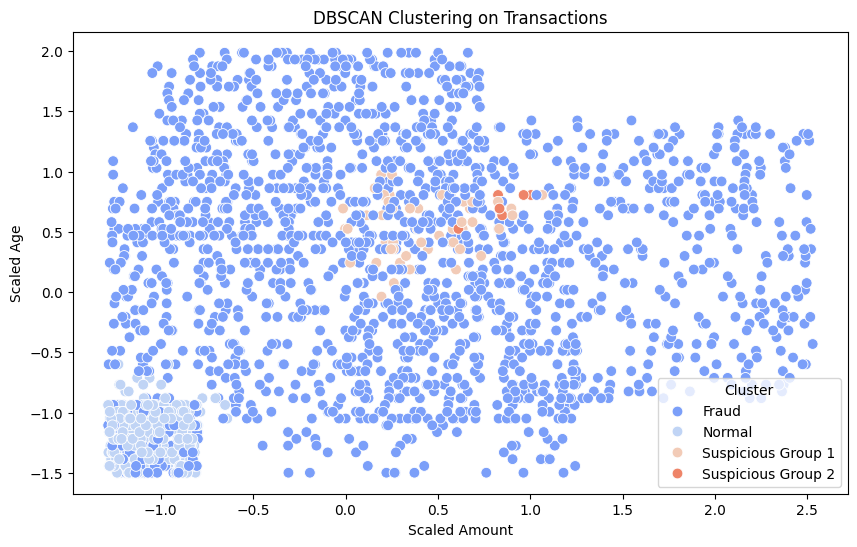

In [67]:
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

# Adjusted DBSCAN clustering with a refined eps value
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Adjust eps based on k-distance elbow
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add labels to the dataset
bt['DBSCAN_Cluster'] = dbscan_labels

# Map the cluster labels to descriptive names
label_mapping = {-1: 'Fraud', 0: 'Normal', 1: 'Suspicious Group 1', 2: 'Suspicious Group 2'}
bt['DBSCAN_Cluster'] = bt['DBSCAN_Cluster'].map(label_mapping)

# Plotting with updated labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=bt['DBSCAN_Cluster'], palette='coolwarm', s=60)
plt.title('DBSCAN Clustering on Transactions')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend(title='Cluster')
plt.show()

**Hierarchical Clustering on Transactions**

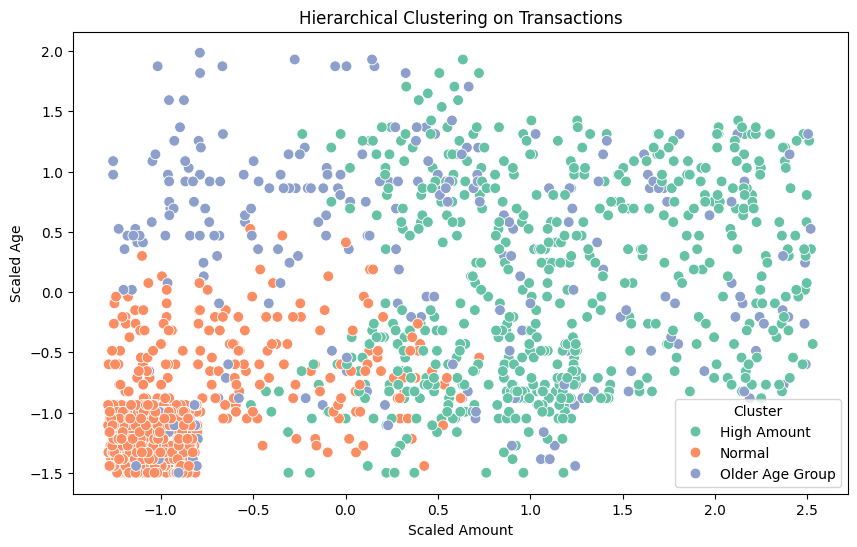

In [68]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Add labels to the dataset
bt['Hierarchical_Cluster'] = hierarchical_labels

# Mapping the cluster labels to descriptive names
cluster_mapping = {0: 'Normal', 1: 'High Amount', 2: 'Older Age Group'}
bt['Hierarchical_Cluster'] = bt['Hierarchical_Cluster'].map(cluster_mapping)

# Plot with updated labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=bt['Hierarchical_Cluster'], palette='Set2', s=60)
plt.title('Hierarchical Clustering on Transactions')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend(title='Cluster')
plt.show()

**Isolation Forest for Anomaly Detection**

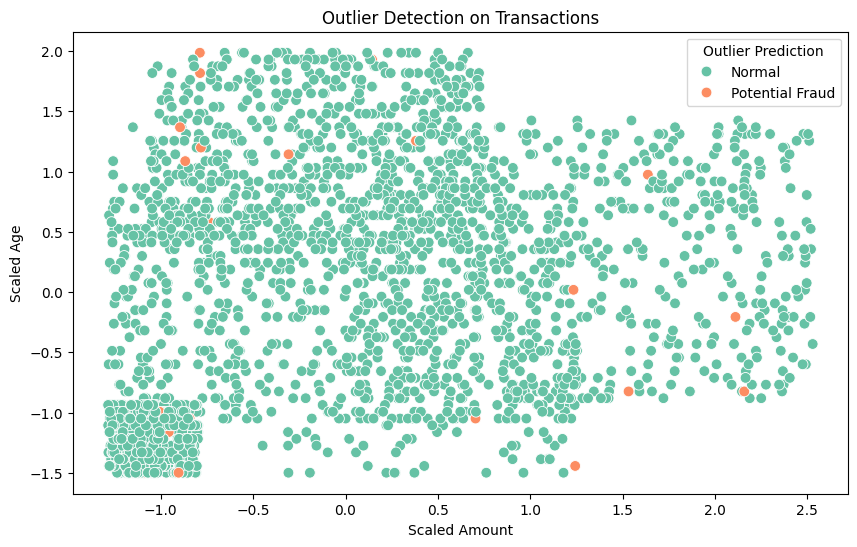

In [69]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest to identify anomalies
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # Set contamination rate to expected fraud rate
outlier_pred = iso_forest.fit_predict(X_scaled)

# Map the results (-1 for outliers, 1 for normal) to descriptive labels
outlier_mapping = {1: 'Normal', -1: 'Potential Fraud'}
bt['Outlier_Prediction'] = pd.Series(outlier_pred).map(outlier_mapping)

# Plotting with isolation forest outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=bt['Outlier_Prediction'], palette='Set2', s=60)
plt.title('Outlier Detection on Transactions')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend(title='Outlier Prediction')
plt.show()

**Computing the Z score**

Number of outliers per column:
TransactionAmount      48
CustomerAge             0
TransactionDuration     0
LoginAttempts          95
AccountBalance          0
dtype: int64


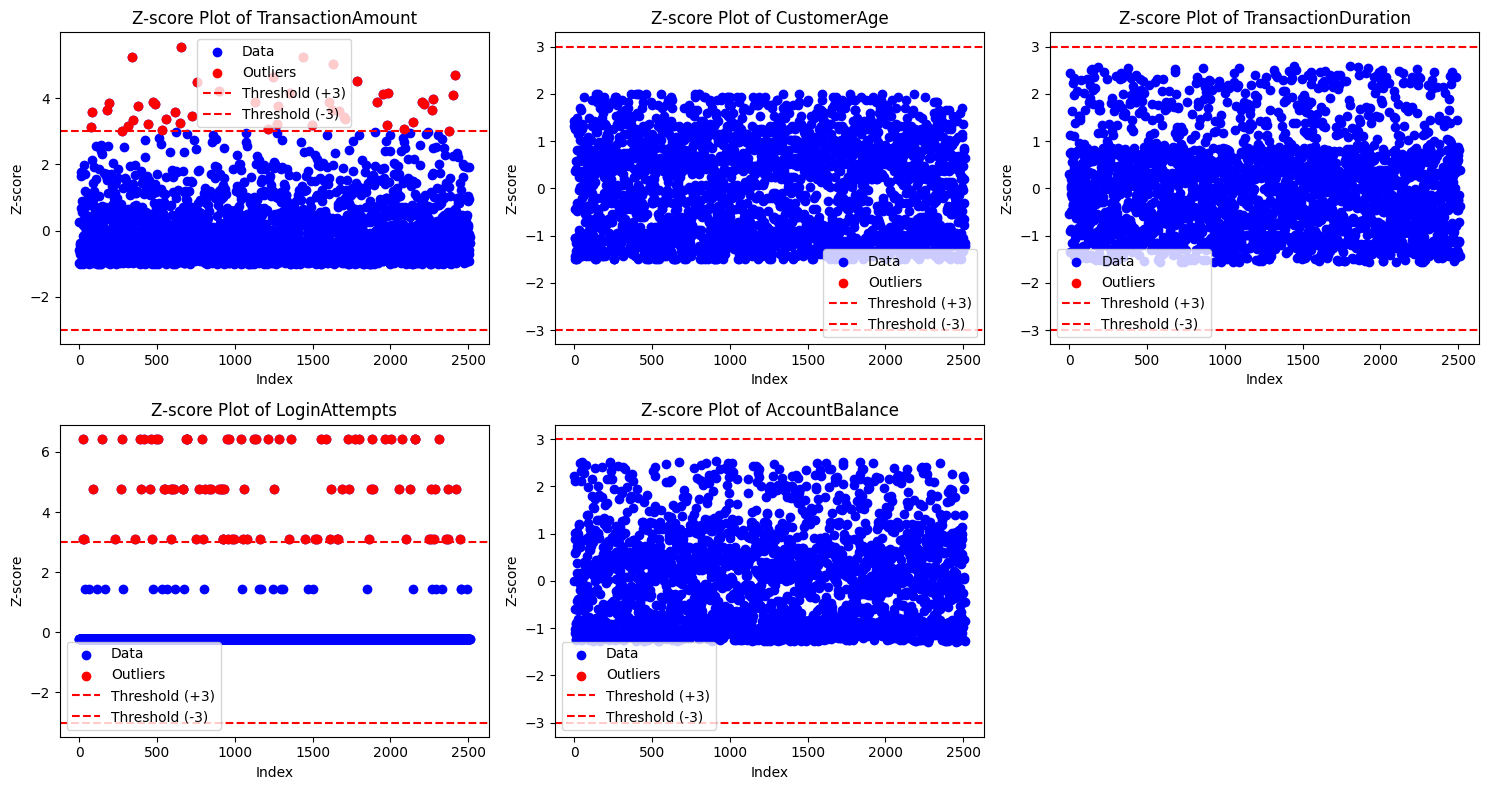

In [70]:

from scipy.stats import zscore

# Identify numerical columns
num_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Compute Z-scores
z_scores = btd[num_cols].apply(zscore)

# Define threshold for outliers
threshold = 3

# Identify outliers (boolean DataFrame)
outliers = (np.abs(z_scores) > threshold)
# Count the number of outliers per column
outlier_counts = outliers.sum()

# Display the number of outliers for each column
print("Number of outliers per column:")
print(outlier_counts)

# Create subplots for visualization
fig, axes = plt.subplots(nrows=2, ncols=len(num_cols)//2 + 1, figsize=(15, 8))
axes = axes.flatten()  # Flatten the axes for easy iteration

for i, col in enumerate(num_cols):
    ax = axes[i]  # Use the predefined subplot

    # Scatter plot of Z-scores
    ax.scatter(range(len(btd[col])), z_scores[col], color='blue', label='Data')
    ax.scatter(np.where(outliers[col])[0], z_scores[col][outliers[col]], color='red', label='Outliers')
    ax.axhline(y=threshold, color='r', linestyle='--', label='Threshold (+3)')
    ax.axhline(y=-threshold, color='r', linestyle='--', label='Threshold (-3)')
    ax.set_title(f'Z-score Plot of {col}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Z-score')
    ax.legend()

# Hide any unused subplots (if columns are fewer than grid slots)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
